**SOFT DEADLINE:** `20.03.2022 23:59 msk` 

# [5 points] Part 1. Data cleaning

The task is to clear the text data of the crawled web-pages from different sites. 

It is necessary to ensure that the distribution of the 100 most frequent words includes only meaningful words in english language (not particles, conjunctions, prepositions, numbers, tags, symbols).

Determine the order of operations below and carry out the appropriate cleaning.

1. Remove non-english words
1. Remove html-tags (try to do it with regular expression, or play with beautifulsoap library)
1. Apply lemmatization / stemming
1. Remove stop-words
1. Additional processing - At your own initiative, if this helps to obtain a better distribution

#### Hints

1. To do text processing you may use nltk and re libraries
1. and / or any other libraries on your choise

#### Data reading

The dataset for this part can be downloaded here: `https://drive.google.com/file/d/1wLwo83J-ikCCZY2RAoYx8NghaSaQ-lBA/view?usp=sharing`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
import nltk
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('words')
nltk.download('stopwords')
nltk.download("wordnet")

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("drive/MyDrive/NLP/web_sites_data.csv")

In [4]:
def char_range(c1, c2):
    for c in range(ord(c1), ord(c2)+1):
        yield chr(c)

In [5]:
words = set(nltk.corpus.words.words())
letters = set(char_range('a','z'))
stop_words = stopwords.words("english")
lemmatizer = WordNetLemmatizer()

#### Data processing

In [6]:
def remove_tags(html):
    soup = BeautifulSoup(html,"html.parser")
    for data in soup(['style', 'script']):
        data.decompose()
  
    return ' '.join(soup.stripped_strings)

In [7]:
def preprocess(string):
  string = remove_tags(string)
  string=string.lower()
  string = " ".join(w for w in nltk.wordpunct_tokenize(string)
         if (w in words) and (w not in letters))
  tokens = [token for token in string.split(' ') if token not in stop_words]
  string = [lemmatizer.lemmatize(token) for token in tokens]
  string = " ".join(w for w in string)
  string = string.replace("\t","").replace('\n',"")
  return string

In [8]:
def process(df,k):
  start=0
  end=k
  while(start<len(df)):
    if(end>len(df)):
      end=len(df)
    data=df[start:end]
    data["processed_text"] = data["text"].apply(lambda x: preprocess(x))
    for index,line in pd.DataFrame(data['processed_text']).iterrows():
      df.at[index,"processув_text"]=line['processed_text']
    del(data)
    start+=k
    end+=k
    print("Iterations mades:",start//k)

In [ ]:
process(df,500)

In [10]:
df.to_csv('drive/MyDrive/NLP/_data.csv')

In [65]:
df

,text,processed_text,process_text,processув_text
0,"<html>\n<head profile=""http://www.w3.org/2005/...",0.0,eric love war eric love war author eric title ...,eric love war eric love war author eric title ...
1,"<html>\n<head profile=""http://www.w3.org/2005/...",0.0,eric short walk eric short walk author eric ti...,eric short walk eric short walk author eric ti...
2,"<html>\n<head profile=""http://www.w3.org/2005/...",0.0,poetry unabridged poetry unabridged author tit...,poetry unabridged poetry unabridged author tit...
3,"<html>\n<head profile=""http://www.w3.org/2005/...",0.0,uncle cabin uncle cabin author title uncle cab...,uncle cabin uncle cabin author title uncle cab...
4,"<html>\n<head profile=""http://www.w3.org/2005/...",0.0,consider lily consider lily author title consi...,consider lily consider lily author title consi...
...,...,...,...,...
71694,"<?xml version=""1.0"" encoding=""UTF-8""?>\n \n...",0.0,NaN,donkey march skip donkey march section skip ma...
71695,"<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 T...",0.0,NaN,true crime street la spec game home news guess...
71696,"<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 T...",0.0,NaN,world soccer winning eleven spec game home new...
71697,"<?xml version=""1.0"" encoding=""UTF-8""?>\n \n...",0.0,NaN,really rock skip really rock section skip main...


In [67]:
lines = df["processув_text"].tolist()

In [23]:
def delete_empties(line):
  if "" in line:
    line.remove("")
  return line

In [68]:
voc_list=[]
for line in lines:
  voc_list.extend(delete_empties(line.split(" ")))

#### Vizualization

As a visualisation, it is necessary to construct a frequency distribution of words (the 100 most common words), sorted by frequency. 

For visualization purposes we advice you to use plotly, but you are free to choose other libraries

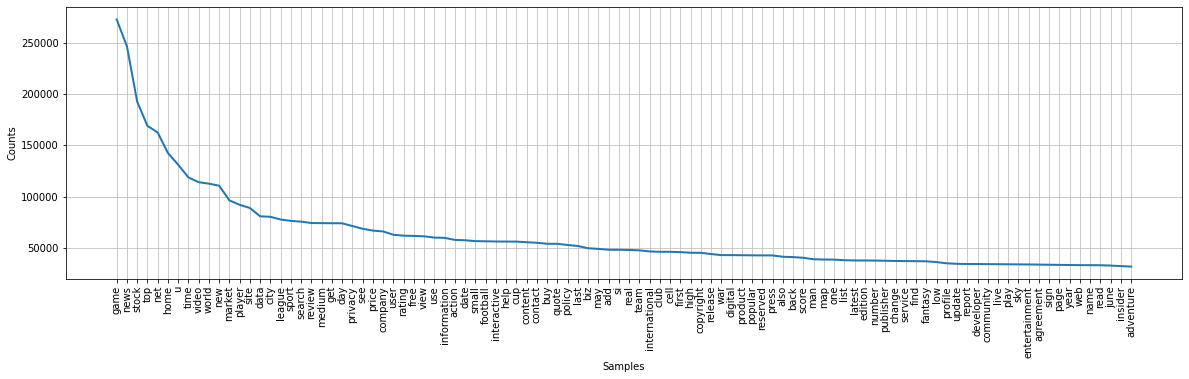

In [69]:
from nltk.probability import FreqDist
plt.figure(figsize=(20, 5))
fdist = FreqDist(voc_list)
fdist.plot(100)

#### Provide examples of processed text (some parts)

Is everything all right with the result of cleaning these examples? What kind of information was lost?

In [70]:
df['processув_text'][5]

'autobiography autobiography author title autobiography available senna versus story deadly rivalry racing driver never saw abridged automotive edition format miscellaneous motor sport nonfiction racing sport sport outdoors unlaunched binding audio date publisher audio edition abridged description product description early struggle fought back broken neck sell house fund racing triumph neck neck like senna still drove book forthrightly fellow well formula winning championship comeback end add save later web related recommend'

In [71]:
df['processув_text'][105]

'jean de seashore collins watch guide jean de seashore collins watch guide author jean de title seashore collins watch guide available biological ecology nature ecology oceanography outdoors nature professional technical professional science reference science binding spiral bound date publisher weight size used description product description introduction seashore young black white section important classification food cycle specie immobile also information exploring seashore fold help immediate reference book laminated used anywhere rain seaside without risk spoiling add save later web related recommend'

# [10 points] Part 2. Duplicates detection. LSH

#### Libraries you can use

1. LSH - https://github.com/ekzhu/datasketch
1. LSH - https://github.com/mattilyra/LSH
1. Any other library on your choise

1. Detect duplicated text (duplicates do not imply a complete word-to-word match, but texts that may contain a paraphrase, rearrangement of words, sentences)
1. Make a plot dependency of duplicates on shingle size (with fixed minhash length) 
1. Make a plot dependency of duplicates on minhash length (with fixed shingle size)

In [2]:
df=pd.read_csv("drive/MyDrive/NLP/_data.csv")

In [4]:
df=df['processув_text']

In [10]:
data=df[:5000]

NameError: ignored

In [11]:
data=pd.DataFrame(data)

In [6]:
del df

In [7]:
def build_shingles(sentence: str, k: int):
    shingles = []
    for i in range(len(sentence) - k):
        shingles.append(sentence[i:i+k])
    return set(shingles)

def build_vocab(shingle_sets: list):
    # convert list of shingle sets into single set
    full_set = {item for set_ in shingle_sets for item in set_}
    vocab = {}
    for i, shingle in enumerate(list(full_set)):
        vocab[shingle] = i
    return vocab

def one_hot(shingles: set, vocab: dict):
    vec = np.zeros(len(vocab))
    for shingle in shingles:
        idx = vocab[shingle]
        vec[idx] = 1
    return vec

In [12]:
lines= data['processув_text'].tolist()
lines[:3]

['eric love war eric love war author eric title love war available short walk slowly mediterranean last grain race round low gear box show abridged ancient general eastern front edition format florence history history general history general home front intelligence medieval military naval pearl harbor personal reference renaissance travel travel general western front world war writing binding audio date publisher audio weight size edition abridged previous oh previous ca deb description book description made peace summer allied eric among away prison behind went help retreating enemy sheltered three classic memoir selfless people unchanging funny bizarre dangerous local girl later wife exciting story superbly told punch related interest hood freedom available add save later web related recommend',
 'eric short walk eric short walk author eric title short walk available world dozen bookseller lovely three tea one man mission elegance hedgehog banner heaven story pat parker feminism smit

In [13]:
def minhash_arr(vocab: dict, resolution: int):
    length = len(vocab.keys())
    arr = np.zeros((resolution, length))
    for i in range(resolution):
        permutation = np.random.permutation(len(vocab)) + 1
        arr[i, :] = permutation.copy()
    return arr.astype(int)

def get_signature(minhash, vector):
    # get index locations of every 1 value in vector
    idx = np.nonzero(vector)[0].tolist()
    # use index locations to pull only +ve positions in minhash
    shingles = minhash[:, idx]
    # find minimum value in each hash vector
    signature = np.min(shingles, axis=1)
    return signature

In [14]:
from itertools import combinations

class LSH:
    buckets = []
    counter = 0
    def __init__(self, b):
        self.buckets=[]
        self.b = b
        for i in range(b):
            self.buckets.append({})

    def make_subvecs(self, signature):
        l = len(signature)
        assert l % self.b == 0
        r = int(l / self.b)
        # break signature into subvectors
        subvecs = []
        for i in range(0, l, r):
            subvecs.append(signature[i:i+r])
        return np.stack(subvecs)
    
    def add_hash(self, signature):
        subvecs = self.make_subvecs(signature).astype(str)
        for i, subvec in enumerate(subvecs):
            subvec = ','.join(subvec)
            if subvec not in self.buckets[i].keys():
                self.buckets[i][subvec] = []
            self.buckets[i][subvec].append(self.counter)
        self.counter += 1

    def check_candidates(self):
        candidates = []
        for bucket_band in self.buckets:
            keys = bucket_band.keys()
            for bucket in keys:
                hits = bucket_band[bucket]
                if len(hits) > 1:
                    candidates.extend(combinations(hits, 2))
        return set(candidates)

In [15]:
def all_procedure(data,shingle_size: int, minhash_size: int):
  lines= data['processув_text'].tolist()
  shingles = []
  for line in lines:
    shingles.append(build_shingles(line, shingle_size))
  del (lines)
  vocab = build_vocab(shingles)
  shingles_1hot = []
  for shingle_set in shingles:
    shingles_1hot.append(one_hot(shingle_set, vocab))
  del shingles
  shingles_1hot = np.stack(shingles_1hot)
  arr = minhash_arr(vocab, minhash_size)
  del vocab
  signatures = []
  for vector in shingles_1hot:
    signatures.append(get_signature(arr, vector))
  del shingles_1hot
  signatures = np.stack(signatures)
  b = 5
  lsh = LSH(b)
  for signature in signatures:
    lsh.add_hash(signature)
  del signatures
  candidate_pairs = lsh.check_candidates()
  length = len(candidate_pairs)
  del candidate_pairs
  return length

In [16]:
def duplicates_vs_shingles():
  y=[]
  x=list(range(2,6))
  for i in x:
    print(i)
    y.append(all_procedure(data,shingle_size=i,minhash_size=100))
  plt.scatter(x,y)
  plt.xlabel("Shingle size")
  plt.ylabel("Number of duplicates")
  plt.grid()
  plt.show()

2
3
4
5


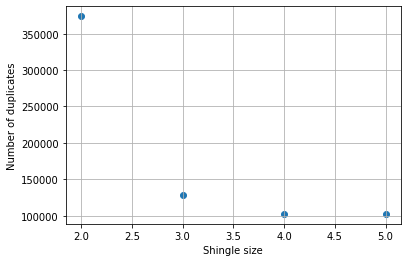

In [17]:
duplicates_vs_shingles()

In [21]:
def duplicates_vs_minhash():
  y=[]
  x=[5,10,15,20,25,30]
  for i in x:
    y.append(all_procedure(data,shingle_size=4,minhash_size=i))
  plt.scatter(x,y)
  plt.xlabel("Minhash size")
  plt.ylabel("Number of duplicates")
  plt.grid()
  plt.show()

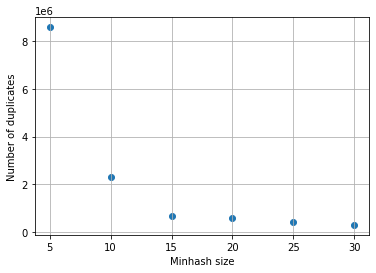

In [22]:
duplicates_vs_minhash()

# [Optional 10 points] Part 3. Topic model

In this part you will learn how to do topic modeling with common tools and assess the resulting quality of the models. 

The provided data contain chunked stories by Edgar Allan Poe (EAP), Mary Shelley (MWS), and HP Lovecraft (HPL).

The dataset can be downloaded here: `https://drive.google.com/file/d/14tAjAzHr6UmFVFV7ABTyNHBh-dWHAaLH/view?usp=sharing`

#### Preprocess dataset with the functions from the Part 1

#### Quality estimation

Implement the following three quality fuctions: `coherence` (or `tf-idf coherence`), `normalized PMI`, `based on the distributed word representation`(you can use pretrained w2v vectors or some other model). You are free to use any libraries (for instance gensim) and components.

### Topic modeling

Read and preprocess the dataset, divide it into train and test parts `sklearn.model_selection.train_test_split`. Test part will be used in classification part. For simplicity we do not perform cross-validation here, but you should remember about it.

Plot the histogram of resulting tokens counts in the processed datasets.

Plot the histogram of resulting tokens counts in the processed datasets.

#### NMF

Implement topic modeling with NMF (you can use `sklearn.decomposition.NMF`) and print out resulting topics. Try to change hyperparameters to better fit the dataset.

#### LDA

Implement topic modeling with LDA (you can use gensim implementation) and print out resulting topics. Try to change hyperparameters to better fit the dataset.

### Additive regularization of topic models 

Implement topic modeling with ARTM. You may use bigartm library (simple installation for linux: pip install bigartm) or TopicNet framework (`https://github.com/machine-intelligence-laboratory/TopicNet`)

Create artm topic model fit it to the data. Try to change hyperparameters (number of specific and background topics) to better fit the dataset. Play with smoothing and sparsing coefficients (use grid), try to add decorrelator. Print out resulting topics.

Write a function to convert new documents to topics probabilities vectors.

Calculate the quality scores for each model. Make a barplot to compare the quality.